In [266]:
import pandas as pd
import numpy as np
import seaborn as sns


In [267]:
df = pd.read_csv("laptops.csv")
df.columns = df.columns.str.lower().str.replace(" " , "_")
df.columns

Index(['laptop', 'status', 'brand', 'model', 'cpu', 'ram', 'storage',
       'storage_type', 'gpu', 'screen', 'touch', 'final_price'],
      dtype='object')

In [268]:
columns = ["ram", "storage" , "screen" , "final_price"]

<Axes: xlabel='final_price', ylabel='Count'>

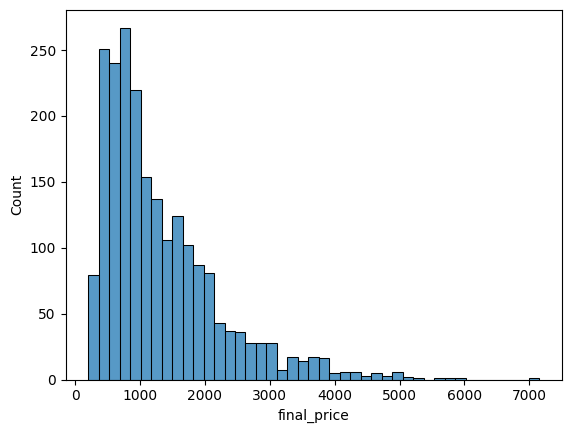

In [269]:
sns.histplot(df["final_price"]) 

In [270]:
df = df[columns]
df.isnull().sum()

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [271]:
df["ram"].median()

np.float64(16.0)

In [272]:

n = len(df)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

n_train = int (n * 0.6)
n_val =int(n * 0.2) 
n_test = n - (n_train + n_val)

In [273]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val ]]
df_test = df.iloc[idx[n_train+n_val: ]]

In [274]:
y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

In [275]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

def prepare_X(df, fillna_value):
    df = df.fillna(fillna_value)
    X = df.values
    return X

def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)


def train_linear_regression_regularized(X, y,r):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r* np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [276]:
mean = df_train.ram.mean()
X_train = prepare_X(df_train, fillna_value=0)
w0,w = train_linear_regression(X_train,y_train)

X_val = prepare_X(df_val,0)
pred = X_val.dot(w) + w0
rmse(y_val,pred)

np.float64(597.3635593619641)

In [277]:
for r in [0, 0.01, 0.1, 1, 10, 100]:

    mean = 0
    X_train = prepare_X(df_train, fillna_value=mean)
    w0,w = train_linear_regression_regularized(X_train,y_train,r)

    X_val = prepare_X(df_val,0)
    pred = X_val.dot(w) + w0
    error = rmse(y_val,pred)
    print(f"r : {r:.3f} --- w0 : {w0} --- w : {w} --- rmse : {error:.2f}")

r : 0.000 --- w0 : 676.8954853016746 --- w : [ 43.70681555   0.86506867 -36.10399833] --- rmse : 597.36
r : 0.010 --- w0 : 676.2736817217958 --- w : [ 43.70642381   0.86504106 -36.06174277] --- rmse : 597.36
r : 0.100 --- w0 : 670.7284836325854 --- w : [ 43.7029297    0.8647949  -35.68491076] --- rmse : 597.35
r : 1.000 --- w0 : 619.9030834118272 --- w : [ 43.67085331   0.8625399  -32.23099446] --- rmse : 597.21
r : 10.000 --- w0 : 352.79713367719523 --- w : [ 43.49940147   0.85075755 -14.07928221] --- rmse : 597.06
r : 100.000 --- w0 : 66.92071440185458 --- w : [43.26181083  0.83943545  5.35037812] --- rmse : 597.90


In [278]:
rmses = []
for r in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    n = len(df)
    idx = np.arange(n)
    np.random.seed(r)
    np.random.shuffle(idx)

    n_train = int (n * 0.6)
    n_val =int(n * 0.2) 
    n_test = n - (n_train + n_val)
   
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val ]]
    df_test = df.iloc[idx[n_train+n_val: ]]

    y_train = df_train.final_price.values
    y_val = df_val.final_price.values
    y_test = df_test.final_price.values

    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    

    mean = 0
    X_train = prepare_X(df_train, fillna_value=mean)
    w0,w = train_linear_regression(X_train,y_train)

    X_val = prepare_X(df_val,0)
    pred = X_val.dot(w) + w0
    error = rmse(y_val,pred)
    rmses.append(error)
    print(f"r : {r:.3f} --- w0 : {w0} --- w : {w} --- rmse : {error:.2f}")

np.std(rmses)

r : 0.000 --- w0 : 547.5696230196595 --- w : [ 41.53483597   0.95193407 -28.81992785] --- rmse : 565.45
r : 1.000 --- w0 : 594.4197428014472 --- w : [ 43.90073635   0.90174656 -32.52410764] --- rmse : 636.80
r : 2.000 --- w0 : 649.4685454780993 --- w : [ 39.15406487   0.94332588 -33.11141159] --- rmse : 588.96
r : 3.000 --- w0 : 571.9459040123786 --- w : [ 47.46271336   0.78556786 -30.72351238] --- rmse : 597.81
r : 4.000 --- w0 : 629.3882030655427 --- w : [ 40.19918209   1.03444197 -36.2341651 ] --- rmse : 571.96
r : 5.000 --- w0 : 580.7647373339839 --- w : [ 47.97475317   0.85917953 -33.00392009] --- rmse : 573.24
r : 6.000 --- w0 : 783.7683689923456 --- w : [ 37.597798     1.08609144 -45.90286683] --- rmse : 647.34
r : 7.000 --- w0 : 376.435860063457 --- w : [ 43.30552477   0.83803389 -15.0276907 ] --- rmse : 550.44
r : 8.000 --- w0 : 572.8852361208681 --- w : [ 39.5651649    0.94142674 -29.84965091] --- rmse : 587.33
r : 9.000 --- w0 : 663.3792792621913 --- w : [ 38.0093441    0.90

np.float64(29.176491258298974)

In [279]:
rmses = []
r = 9
n = len(df)
idx = np.arange(n)
np.random.seed(r)
np.random.shuffle(idx)

n_train = int (n * 0.6)
n_val =int(n * 0.2) 
n_test = n - (n_train + n_val)

df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val ]]
df_test = df.iloc[idx[n_train+n_val: ]]

y_train = df_train.final_price.values
y_val = df_val.final_price.values
y_test = df_test.final_price.values

del df_train['final_price']
del df_val['final_price']
del df_test['final_price']


df_full_train = pd.concat([df_train, df_val])


X_full_train = prepare_X(df_full_train, fillna_value=0)
y_full_train = np.concatenate([y_train, y_val])
w_0, w = train_linear_regression_regularized(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, fillna_value=0)
y_pred = w_0 + X_test.dot(w)

result = rmse(y_test, y_pred)
print(result)

608.609982204966
